# Identify Missing or Incorrect Data
Q1: Identify missing or incorrect data in the dataset and apply appropriate preprocessing steps to clean it (code and explanation)

In [135]:
import pandas as pd
import numpy as np

# Loading the dataset
file_path = 'dataset.csv'
dataset = pd.read_csv(file_path)

# Identifying missing data
missing_data = dataset.isnull().sum()

# Handling missing data
# For numerical columns, filling missing values with the mean
num_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
for col in num_cols:
    dataset[col].fillna(dataset[col].mean(), inplace=True)
# For categorical columns, filling missing values with the mode (most frequent value)
cat_cols = ['species', 'island', 'sex']
for col in cat_cols:
    dataset[col].fillna(dataset[col].mode()[0], inplace=True)

# Identifying incorrect or inconsistent data (e.g., negative body mass or invalid sex values)
# Removing negative 'body_mass_g' values
dataset = dataset[dataset['body_mass_g'] > 0]
# Removing invalid sex values
dataset = dataset[dataset['sex'].isin(['male', 'female'])]

print(missing_data,'\n')
print(dataset)

species               0
island                0
bill_length_mm        7
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  16
dtype: int64 

       species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen       39.100000       18.70000         181.000000   
1       Adelie  Torgersen       39.500000       17.40000         186.000000   
2       Adelie  Torgersen       40.300000       18.00000         195.000000   
3       Adelie  Torgersen       43.876855       17.15117         200.915205   
4       Adelie  Torgersen       36.700000       19.30000         193.000000   
..         ...        ...             ...            ...                ...   
338  Chinstrap      Dream       45.700000       17.00000         195.000000   
339  Chinstrap      Dream       55.800000       19.80000         207.000000   
340  Chinstrap      Dream       43.500000       18.10000         202.000000   
341  Chinstrap      Dream  

# Average Body Mass
Q2: What is the average body_mass_g for Gentoo penguins? (code)

In [136]:
# Filtering the dataset for Gentoo penguins
gentoo_penguins = dataset[dataset['species'] == 'Gentoo']

# Calculating the average body_mass_g for Gentoo penguins
average_body_mass_gentoo = gentoo_penguins['body_mass_g'].mean()

print(average_body_mass_gentoo)

5126.806262969251


# Analysing the Distributions of bill_length and bill_depth
Q3: How do the distributions of bill_length_mm and bill_depth_mm differ between the three penguin species? Analyze the skewness and kurtosis of each feature for different species. (code and explanation)

In [144]:
from scipy.stats import skew, kurtosis

# Filtering dataset by species
adelie = dataset[dataset['species'] == 'Adelie']
gentoo = dataset[dataset['species'] == 'Gentoo']
chinstrap = dataset[dataset['species'] == 'Chinstrap']

# Function to calculate skewness and kurtosis
def calc_skew_kurt(data, feature):
    skew_val = skew(data[feature].dropna())
    kurt_val = kurtosis(data[feature].dropna())
    return skew_val, kurt_val

# Analyze bill_length_mm and bill_depth_mm for each species
features = ['bill_length_mm', 'bill_depth_mm']

for species, species_name in zip([adelie, gentoo, chinstrap], ['Adelie', 'Gentoo', 'Chinstrap']):
    species_results = {}
    for feature in features:
        skew_val, kurt_val = calc_skew_kurt(species, feature)
        species_results[feature] = {'Skewness': skew_val, 'Kurtosis': kurt_val}
    print(species_name)
    print(pd.DataFrame(species_results),'\n\n')

Adelie
          bill_length_mm  bill_depth_mm
Skewness        0.160350       0.303584
Kurtosis       -0.246441      -0.096149 


Gentoo
          bill_length_mm  bill_depth_mm
Skewness        0.712323       0.334623
Kurtosis        1.147647      -0.611126 


Chinstrap
          bill_length_mm  bill_depth_mm
Skewness       -0.078094       0.017487
Kurtosis       -0.154123      -0.925715 




# Identifying Outliers
Q4: Identify which features in the dataset have outliers. Provide the method used to detect them and visualize the outliers. (code and explanation)

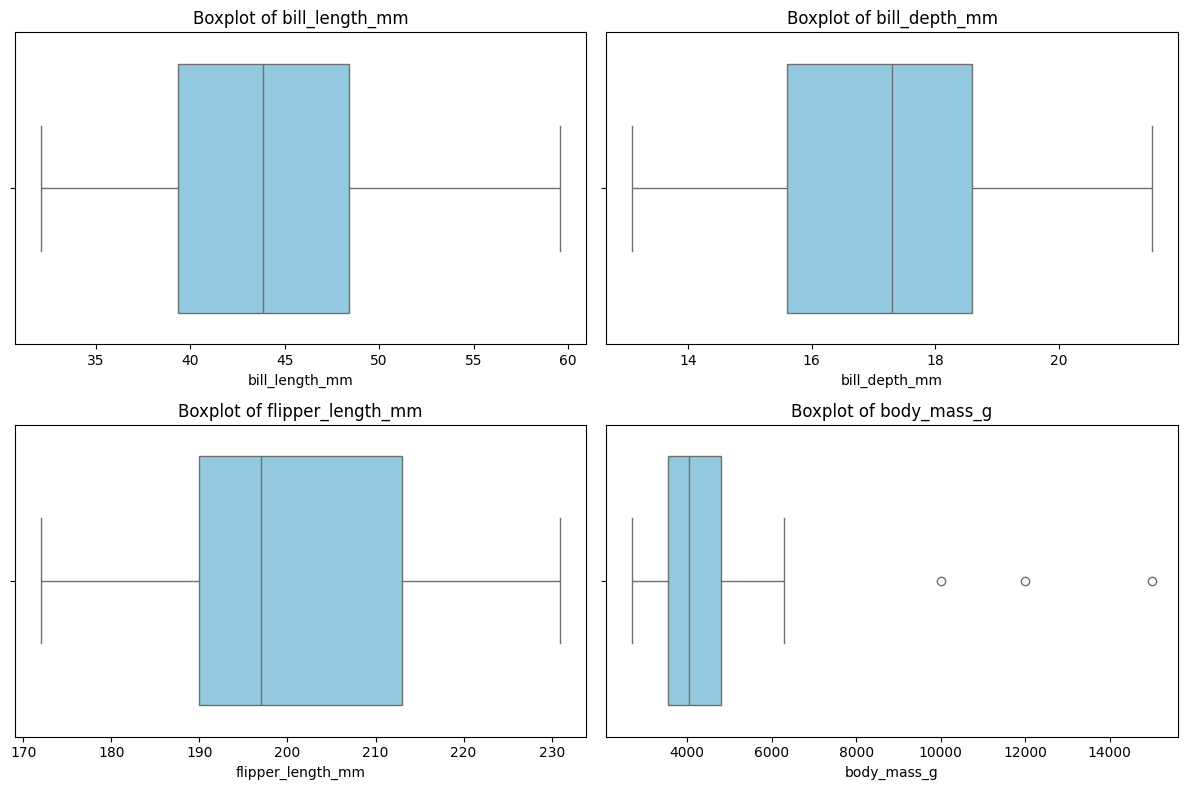


 {'bill_length_mm': Empty DataFrame
Columns: [species, island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex]
Index: [], 'bill_depth_mm': Empty DataFrame
Columns: [species, island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex]
Index: [], 'flipper_length_mm': Empty DataFrame
Columns: [species, island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex]
Index: [], 'body_mass_g':        species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
73      Adelie  Torgersen            45.8           18.9              197.0   
206     Gentoo     Biscoe            46.5           14.4              217.0   
324  Chinstrap      Dream            51.5           18.7              187.0   

     body_mass_g     sex  
73       15000.0    male  
206      12000.0  female  
324      10000.0    male  }


In [138]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical features to analyze
numerical_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Defining a function to detect outliers using the IQR method
def detect_outliers(data, feature):
    Q1 = data[feature].quantile(0.25)  # First quartile
    Q3 = data[feature].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    return outliers

# Detect outliers for each numerical feature
outliers_dict = {}
for feature in numerical_features:
    outliers_dict[feature] = detect_outliers(dataset, feature)

# Visualizing outliers using boxplots
plt.figure(figsize=(12, 8))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=dataset[feature], color='skyblue')
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

# Outliers dictionary to see which features have outliers
print('\n',outliers_dict)


# Curse of Dimensionality
Q5: Does this dataset contribute to the curse of dimensionality? If yes perform PCA. (code and explanation required)

The "curse of dimensionality" refers to the problem that arises when the number of features (dimensions) in a dataset increases, making it difficult for machine learning algorithms to generalize effectively. High-dimensional datasets can lead to overfitting, sparsity in the feature space, and increased computational costs, especially if many of the features are not informative.

In general, if a dataset has many features but not enough data points to adequately represent the relationships between those features, it can lead to the curse of dimensionality. However, in the case of the penguin dataset, the dataset isn't likely to suffer from the curse of dimensionality unless There are a large number of uninformative features or The dataset has more features than observations.

But, we can still perform Principal Component Analysis (PCA) to reduce the dimensionality and ensure that only the most significant features are retained, improving model performance or visualization.

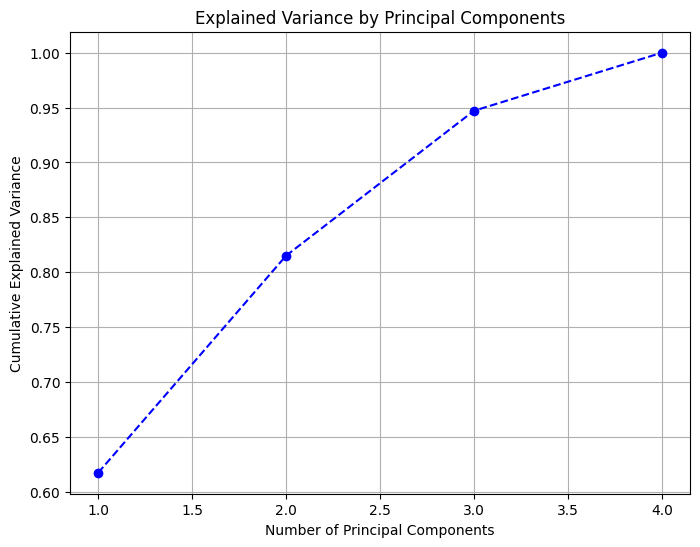

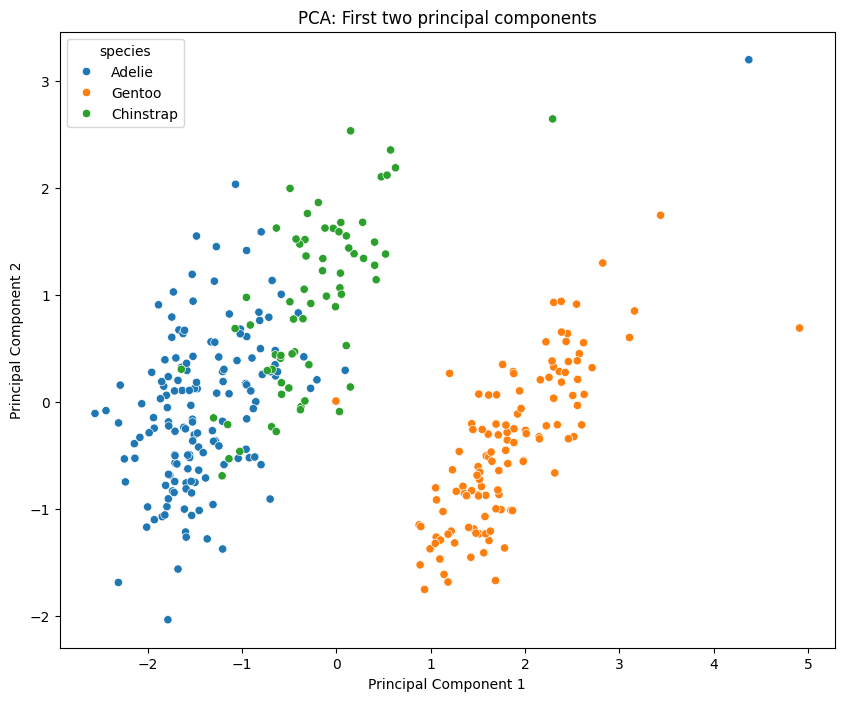

In [139]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Selecting numerical features for PCA
numerical_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Dropping rows with missing values and standardize the data
clean_data = dataset[numerical_features].dropna()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clean_data)

# Applying PCA
pca = PCA(n_components=len(numerical_features))  # Number of components = number of features
pca_result = pca.fit_transform(scaled_data)

# Checking how much variance is explained by each component
explained_variance = pca.explained_variance_ratio_

# Plotting the explained variance
plt.figure(figsize=(8,6))
plt.plot(range(1, len(numerical_features) + 1), explained_variance.cumsum(), marker='o', linestyle='--', color='b')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()
print()

# Visualizing the first two principal components
plt.figure(figsize=(10,8))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=dataset.dropna()['species'])
plt.title('PCA: First two principal components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


# Bill Length vs Bill Depth
Q6: Use bill_length_mm vs bill_depth_mm and plot 7 different graphs to visualize them. (code)

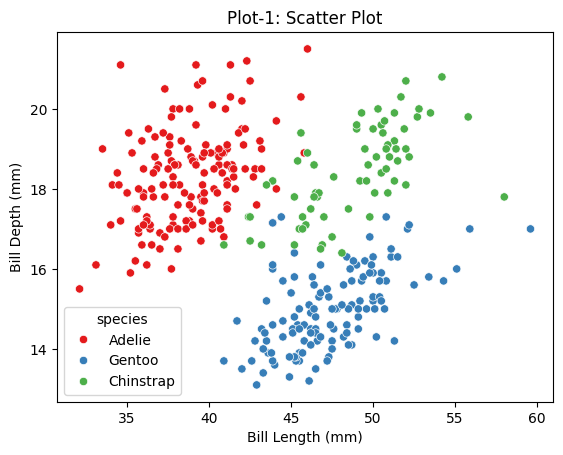

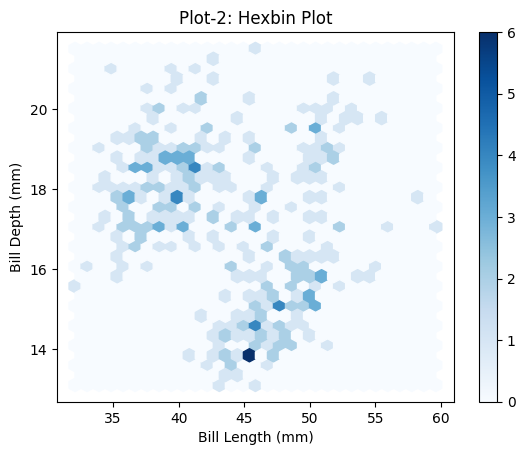

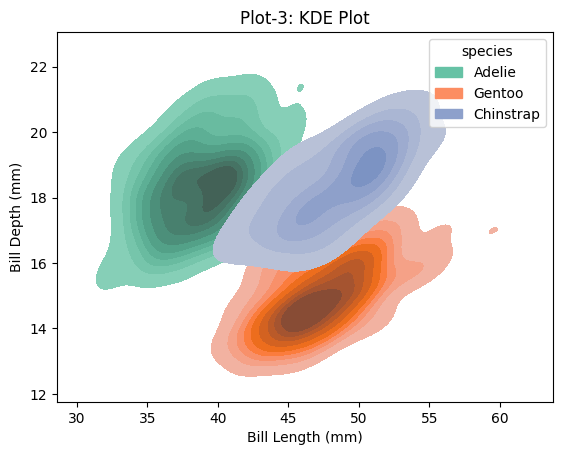

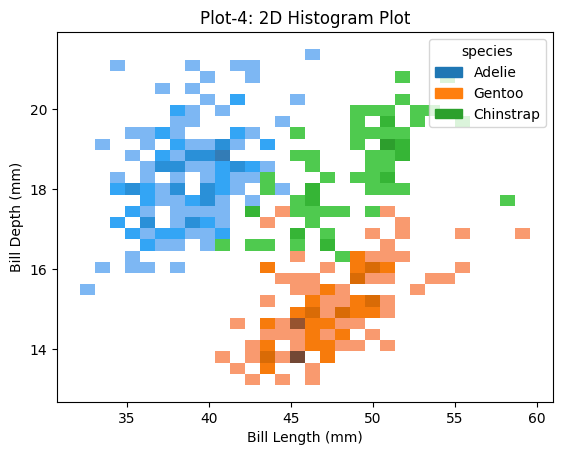

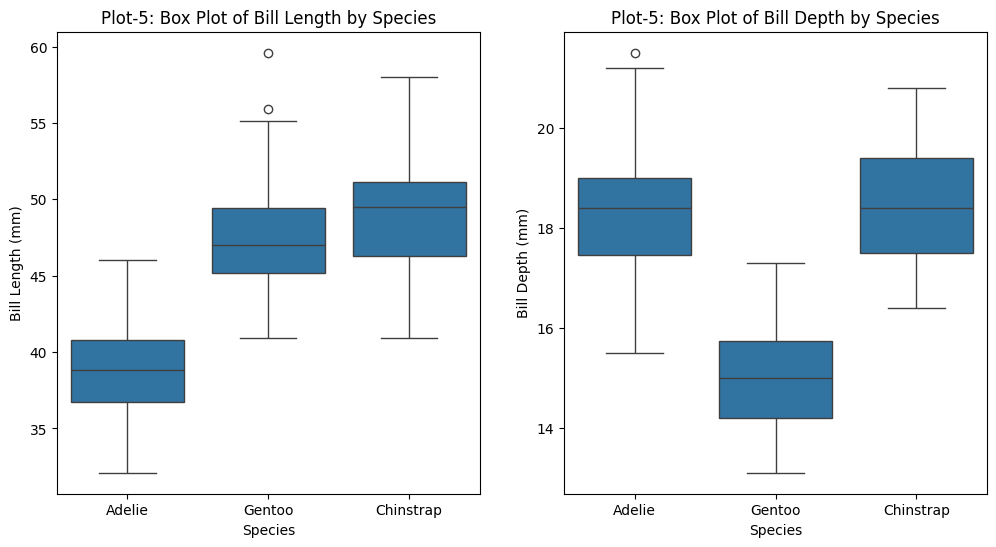

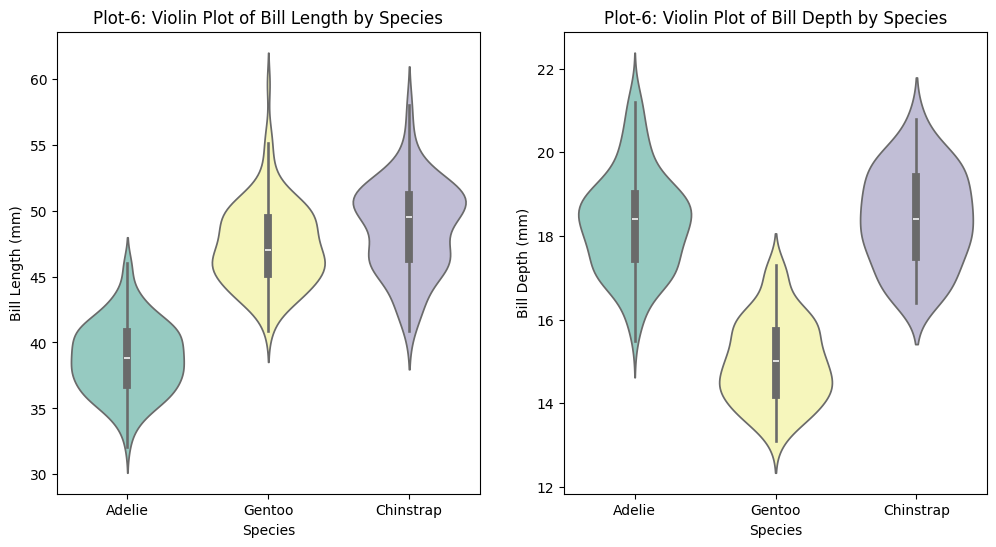

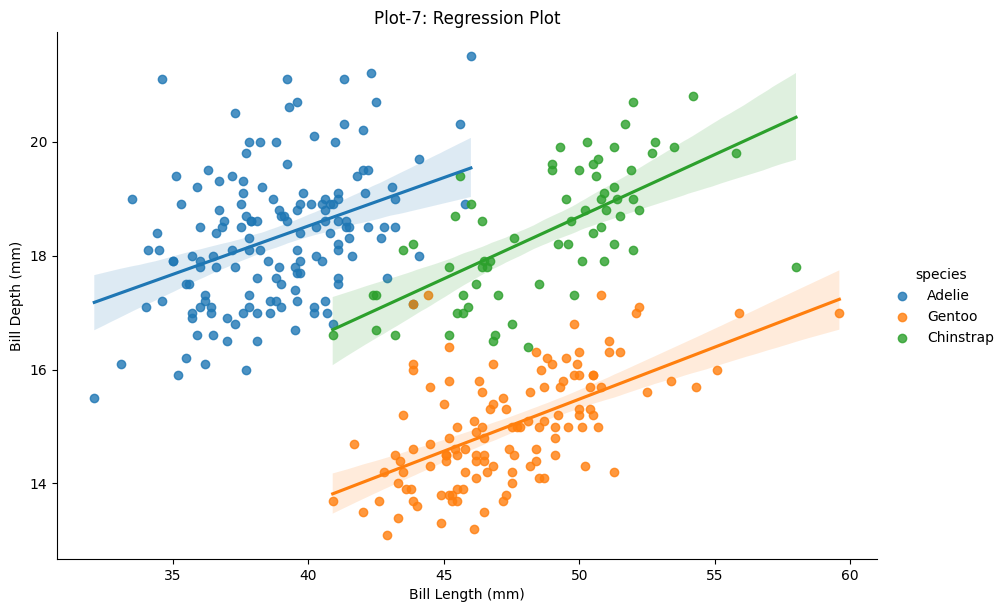

In [140]:
# Plot 1 - Scatter plot
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', data=dataset, hue='species', palette='Set1')
plt.title('Plot-1: Scatter Plot')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.show()
print()

# Plot 2 - Hexbin plot
plt.hexbin(dataset['bill_length_mm'], dataset['bill_depth_mm'], gridsize=30, cmap='Blues')
plt.colorbar()
plt.title('Plot-2: Hexbin Plot')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.show()
print()

# Plot 3 - KDE Plot
sns.kdeplot(x='bill_length_mm', y='bill_depth_mm', data=dataset, hue='species', fill=True, palette="Set2")
plt.title('Plot-3: KDE Plot')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.show()
print()

# Plot 4 - Histogram Plot
sns.histplot(data=dataset, x='bill_length_mm', y='bill_depth_mm', hue='species', bins=30)
plt.title('Plot-4: 2D Histogram Plot')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.show()
print()

# Plot 5 - Box Plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='species', y='bill_length_mm', data=dataset)
plt.title('Plot-5: Box Plot of Bill Length by Species')
plt.ylabel('Bill Length (mm)')
plt.xlabel('Species')

plt.subplot(1, 2, 2)
sns.boxplot(x='species', y='bill_depth_mm', data=dataset)
plt.title('Plot-5: Box Plot of Bill Depth by Species')
plt.xlabel('Species')
plt.ylabel('Bill Depth (mm)')
plt.show()
print()

# Plot 6 - Violin Plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.violinplot(x='species', y='bill_length_mm', data=dataset, hue='species', palette='Set3')
plt.title('Plot-6: Violin Plot of Bill Length by Species')
plt.ylabel('Bill Length (mm)')
plt.xlabel('Species')

plt.subplot(1, 2, 2)
sns.violinplot(x='species', y='bill_depth_mm', data=dataset, hue='species', palette='Set3')
plt.title('Plot-6: Violin Plot of Bill Depth by Species')
plt.xlabel('Species')
plt.ylabel('Bill Depth (mm)')
plt.show()
print()

# Regression Plot
sns.lmplot(x='bill_length_mm', y='bill_depth_mm', data=dataset, hue='species', height=6, aspect=1.5)
plt.title('Plot-7: Regression Plot')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.show()
print()


# Maximum Flipper Length on each Island
Q7: Find the maximum flipper_length_mm for each combination of species and island. Which species has the longest flippers on each island? (code)

In [141]:
# Grouping by species and island, then finding the maximum flipper_length_mm for each group
max_flipper_lengths = dataset.groupby(['species', 'island'])['flipper_length_mm'].max().reset_index()
print(max_flipper_lengths)
print()

# Finding the species with the longest flippers on each island
longest_flippers_per_island = max_flipper_lengths.loc[max_flipper_lengths.groupby('island')['flipper_length_mm'].idxmax()]
print(longest_flippers_per_island)


     species     island  flipper_length_mm
0     Adelie     Biscoe              203.0
1     Adelie      Dream              208.0
2     Adelie  Torgersen              210.0
3  Chinstrap      Dream              212.0
4     Gentoo     Biscoe              231.0

     species     island  flipper_length_mm
4     Gentoo     Biscoe              231.0
3  Chinstrap      Dream              212.0
2     Adelie  Torgersen              210.0


# Z - Score Normalization
Q8: Perform z-score normalization on this dataset. (code)

In [142]:
# Selecting the numerical columns for z-score normalization
numerical_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Initializing the StandardScaler
scaler = StandardScaler()

# Performing z-score normalization (fit and transform)
dataset[numerical_columns] = scaler.fit_transform(dataset[numerical_columns])

# Check the normalized dataset
print(dataset.head())


  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen       -0.882070       0.799446          -1.422150   
1  Adelie  Torgersen       -0.808161       0.135453          -1.065770   
2  Adelie  Torgersen       -0.660342       0.441911          -0.424286   
3  Adelie  Torgersen        0.000565       0.008360          -0.002674   
4  Adelie  Torgersen       -1.325526       1.105904          -0.566838   

   body_mass_g     sex  
0    -0.471653    male  
1    -0.426889  female  
2    -0.919293  female  
3    -0.002547    male  
4    -0.740237  female  
